![Drag Racing](aix.png)


                           
                            
                            
                            
                            
                            
                            
                            
                            
----------
                            louai.kassa-baghdouche@etu.univ-amu.fr
                            ali.chemkhi@etu.univ-amu.fr
----------
                            
$\pagebreak$

# Introduction 

## L'algorithme PageRank:  

En tapant des termes dans le navigateur de Google , on obtient beaucoup de résultats. pourquoi donc ces résultats nous parviennent-ils dans cet ordre ? La réponse à cette question est **l'algorithme PageRank**.

**PageRank** est un algorithme développé par *Larry Page et Sergey Brin*. Il permet de mesurer l'importance d'une page Web en analysant la quantité et la qualité des liens qui pointent vers elle. Il a révolutionné la recherche sur le réseau web en générant une liste de pages webs classées  en fonction de la connectivité du réseau. 

 L'algorithme PageRank est basé sur le fait qu'un internaute aléatoire idéal "*procrastinating pat*" qui va parcourir le réseaux internet , lorsqu'il atteint une page il passe à la page suivante en cliquant sur un lien. L'internaute a une probabilité égale de cliquer sur n'importe quel lien de la page et, lorsqu'il atteint une page sans liens, a une probabilité égale de passer à n'importe quelle autre page en tapant sur son URL (site web). 
 
 De plus, l'internaute peut parfois choisir de saisir un URL aléatoire au lieu de suivre les liens sur une page. Le PageRank est représenté donc par l'ordre de classement des pages de la page la plus probable à la moins probable que l'internaute consultera. 

Dans ce présent travail on va implémenter l'algorithme sur des données artificielles : une matrice de taille 6x6 qui représente 6 sites web qu'on nommera, par example, (*Facebook, YouTube, LinkedIn, Google, Twitter, Wikipédia*), afin de disséquer l'algorithme en plusieurs étapes et jouer avec les diffèrents paramètres. 

**Objectif:**

Les diffèrents étapes que nous allons réaliser sont représentés comme suit: 

* la transformation de l'algorithme PageRank sous un problème d'algèbre linéaire 
 
* Introduction du *Dumping-facteur*

* Implémentation de l'algorithme (simplifé) 

* Implémentation de l'algorithme (Version optimisé) sur des données réeles

 

$\pagebreak$

## PageRank sous un problème d'algèbre linéaire

Imaginons que nous possèdons _un micro netowrk_ (micro internet) avec seulement 6 sites Web qu'on nommera (_Facebook, YouTube, LinkedIn, Google, Twitter, Wikipédia_).
Chaque site Web est lié aux autres, et cela forme un réseau dont les arêtes présentent les liens entre ces pages webs.  

Dans la partie qui suit on essayera de représenter ce réseau  

#### Chargement des packages   de python 

In [1]:
import numpy as np
import numpy.linalg as la
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import networkx as nx
import seedir as sd
from numpy import linalg

np.set_printoptions(suppress=True)

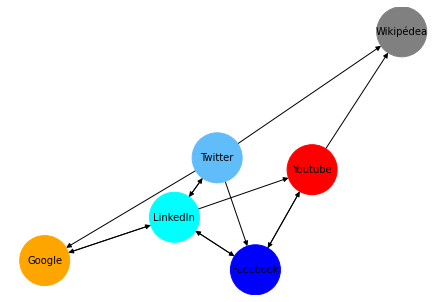

In [11]:
# exemple of adjacency matrix of our network oriented network 

L = np.array([[0,   1/2, 1/3, 0, 0,   0 ],
              [1/3, 0,   0,   0, 1/2, 0 ],
              [1/3, 1/2, 0,   1, 0,   1/2 ],
              [1/3, 0,   1/3, 0, 1/2, 1/2 ],
              [0,   0,   0,   0, 0,   0 ],
              [0,   0,   1/3, 0, 0,   0 ]])

names = ['Facebook', 'Youtube', 'LinkedIn', 'Twitter', 'Wikipédea', 'Google']

L = pd.DataFrame(L, index=names, columns=names)
color_map = ['blue', 'red', 'cyan', '#61bdfa', 'gray', 'orange']
Gd= nx.DiGraph(L)
nx.draw(Gd, with_labels=True, node_size=2500, font_size=10, node_color=color_map)


## Matrice d'adjacence

In [12]:
L = nx.to_pandas_adjacency(Gd)
L

,Facebook,Youtube,LinkedIn,Twitter,Wikipédea,Google
Facebook,0.000000,0.5,0.333333,0.0,0.0,0.0
Youtube,0.333333,0.0,0.000000,0.0,0.5,0.0
LinkedIn,0.333333,0.5,0.000000,1.0,0.0,0.5
Twitter,0.333333,0.0,0.333333,0.0,0.5,0.5
Wikipédea,0.000000,0.0,0.000000,0.0,0.0,0.0
Google,0.000000,0.0,0.333333,0.0,0.0,0.0


## Principe
Le principe de conception du PageRank est que les sites web importants seront liés à des sites web importants. Par analogie avec le principe de la centralité $$x_i = κ^{-1} \sum_{j=1}^{N} A_{ij}x_j$$
les nœuds avec des scores de centralité élevés sont liés à des nœuds avec des scores de centralité élevés .

## Implémentation de l'algorithme 

## Approche récursive (**recursive thinking**)

Imaginez que nous ayons 100 "*pats procrastinateurs*" ou internautes idéales sur notre micro-internet, chacun consultant un seul site Web à la fois. Chaque minute, "les Pats" suivent un lien sur leurs site web vers un autre site sur le micro-internet.

Au bout d'un certain temps, les sites Web les plus liés seront visités par un plus grand nombre de Pats, et à long terme, chaque minute, pour chaque Pat qui quitte un site Web, un autre y entre, ce qui maintient constant le nombre total de Pats sur chaque site Web.

Le PageRank est simplement le classement des sites web en fonction du nombre de Pats qu'ils contiennent à la fin de ce processus.



Nous représentons le nombre de Pats sur chaque site web avec le vecteur, (avec A : Facebook, B : Google, C : Linkedin, D :  Youtube, E : Wikipédea, F : Twitter)

$$\mathbf{r} = \begin{bmatrix} r_{A} \\ r_{B} \\ r_{C} \\ r_{D} \\ r_{E} \\ r_{F} \end{bmatrix}$$

le nombre de Pats sur chaque site web à la minute ou **unité de temps** $i+1$ est lié à ceux à la minute ou **unité de temps** $i$ par la transformation matricielle suivante

$$\mathbf{r}^{(i+1)} = L \,\mathbf{r}^{(i)}$$

Avec la matrice $L$ prenant la forme suivante,

$$L = \begin{bmatrix}
L_{A→A} & L_{B→A} & L_{C→A} & L_{D→A} & L_{E→A} & L_{F→A} \\
L_{A→B} & L_{B→B} & L_{C→B} & L_{D→B} & L_{E→B} & L_{F→B} \\
L_{A→C} & L_{B→C} & L_{C→C} & L_{D→C} & L_{E→C} & L_{F→C} \\
L_{A→D} & L_{B→D} & L_{C→D} & L_{D→D} & L_{E→D} & L_{F→D} \\
L_{A→E} & L_{B→E} & L_{C→E} & L_{D→E} & L_{E→E} & L_{F→E} \\
L_{A→F} & L_{B→F} & L_{C→F} & L_{D→F} & L_{E→F} & L_{F→F} \\
\end{bmatrix}$$

Où les colonnes représentent la probabilité de quitter un site web pour n'importe quel autre site, et leur somme est égale à un.

Les lignes déterminent la probabilité d'entrer sur un site Web à partir de n'importe quel autre site, mais leur somme ne doit pas nécessairement être égale à un.

Le comportement à long terme de ce système est quand $\mathbf{r}^{(i+1)} = \mathbf{r}^{(i)}$, donc  et cela nous permet d'écrire,
$$L \,\mathbf{r} = \mathbf{r}$$


La solution de cette equation n'est que le vecteur propre de perron avec la valeur propre dominante **1** (ceci est garanti par la nature probabiliste de la matrice $L$ **matrice de Markov**).


#### Ici , Nous allons déterminer le vecteur propre de perron correspondant à la valeur propre = 1

In [3]:
eVals, eVecs = la.eig(L) # Gets the eigenvalues and vectors
order = np.absolute(eVals).argsort()[::-1] # Orders them by their eigenvalues
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0] # Sets r to be the principal eigenvector
100 * np.real(r / np.sum(r)) # Make this eigenvector sum to one, then multiply by 100 Procrastinating Pats

array([16.        ,  5.33333333, 40.        , 25.33333333,  0.        ,
       13.33333333])

Puis ,Nous montrons ci-dessous que nous pouvons obtenir le même résultat en utilisant la méthode de l'itération  (récursive).
Tout d'abord, configurons notre vecteur initial, $\mathbf{r}^{(0)}$, de sorte que nos 100 Pats procrastinateurs soient également répartis sur chacun de nos 6 sites Web.

In [4]:
r =  100 * np.ones(6) / 6 # Sets up this vector (6 entries of 1/6 × 100 each)
r 

array([16.66666667, 16.66666667, 16.66666667, 16.66666667, 16.66666667,
       16.66666667])

In [5]:
r = 100 * np.ones(6) / 6 # Sets up this vector (6 entries of 1/6 × 100 each)
for i in np.arange(100) : # Repeat 100 times
    r = L @ r
r

Facebook     16.000000
Youtube       5.333333
LinkedIn     40.000000
Twitter      25.333333
Wikipédea     0.000000
Google       13.333333
dtype: float64

Et voilà on remarque bien que Le vecteur r converge vers le vecteur propre calculé.

## Interprétation 

On peut voire dans cette liste, le nombre de *Pats Procrastinating* que l'on s'attend à trouver sur chaque site web après de longs moments. En les classant par ordre de popularité (sur la base de cette métrique), 

Le PageRank de ce micro-internet est le suivant :
 1. LinkedIn
 2. Twitter
 3. Facebook
 4. Google
 5. Youtube
 6. Wikipédia
 

**Nous pouvons continuer à tourner l'algorithme jusqu'à ce que on atteigne la tolérance requise.**
Dans ce cas par exemple, on a choisi une tolérance de *0.01*

In [6]:
r = 100 * np.ones(6) / 6 
lastR = r
r = L @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = L @ r
    i += 1
    
print(str(i) + " iterations to convergence.")
r

18 iterations to convergence.


Facebook     16.001499
Youtube       5.332520
LinkedIn     39.999169
Twitter      25.332474
Wikipédea     0.000000
Google       13.334338
dtype: float64

$\pagebreak$

Text(0, 0.5, 'Norm diffrence between ri+1-ri')

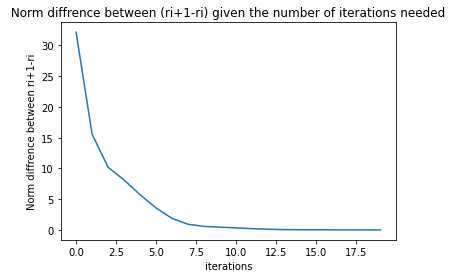

In [7]:
import matplotlib.pyplot as plt

r = 100 * np.ones(6) / 6 
lastR = r
norme=la.norm(lastR - r)
norme_list=[]
for i in np.arange(20) : # Repeat 100 times
    lastR = r
    r = L @ r
    norme=la.norm(lastR - r)
    norme_list.append(norme)

plt.title(" Norm diffrence between (ri+1-ri) given the number of iterations needed ")
plt.plot(np.arange(20) ,norme_list)
plt.xlabel("iterations")
plt.ylabel("Norm diffrence between ri+1-ri")


A partir de ce graph on peut voir ici que la différence entre les normes $||r_{(i+1)} - r_i||$ converge vers 0. 

## Introduction du *Dumping-facteur* 

Quel est l'interet d'introduire ce paramètre ? 

**problématique** :

Un nouveau site web est ajouté au micro-internet : Le site Web de **QUORA**.
Ce site est lié à *Facebook* et ne se lie qu'à lui-même.

Seul le site *Facebook*, qui se trouve dans la moitié inférieure du PageRank, est lié à ce site parmi les deux autres auxquels il est lié.

la nouvelle matrice $L_2$ pour le micro-internet élargi est la suivante :

In [15]:
L2 = np.array([[0,   1/2, 1/3, 0, 0,   0, 0 ],
               [1/4, 0,   0,   0, 1/2, 0, 0 ],
               [1/4, 1/2, 0,   1, 0,   1/2, 0 ],
               [1/4, 0,   1/3, 0, 1/2, 1/2, 0 ],
               [0,   0,   0,   0, 0,   0, 0 ],
               [0,   0,   1/3, 0, 0,   0, 0 ],
               [1/4,   0,   0,   0, 0,   0, 1 ]])

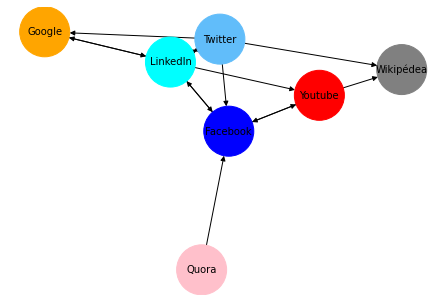

In [16]:
color_map = ['blue', 'red', 'cyan', '#61bdfa', 'gray', 'orange',"pink"]
names = ['Facebook', 'Youtube', 'LinkedIn', 'Twitter', 'Wikipédea', 'Google',"Quora"]
L2 = pd.DataFrame(L2, index=names, columns=names)
Gd= nx.DiGraph(L2) 
nx.draw(Gd, with_labels=True, node_size=2500, font_size=10, node_color=color_map)

In [17]:
L2=nx.to_pandas_adjacency(Gd)
L2

,Facebook,Youtube,LinkedIn,Twitter,Wikipédea,Google,Quora
Facebook,0.00,0.5,0.333333,0.0,0.0,0.0,0.0
Youtube,0.25,0.0,0.000000,0.0,0.5,0.0,0.0
LinkedIn,0.25,0.5,0.000000,1.0,0.0,0.5,0.0
Twitter,0.25,0.0,0.333333,0.0,0.5,0.5,0.0
Wikipédea,0.00,0.0,0.000000,0.0,0.0,0.0,0.0
Google,0.00,0.0,0.333333,0.0,0.0,0.0,0.0
Quora,0.25,0.0,0.000000,0.0,0.0,0.0,1.0


En utilisant l'itération du procrastinateur pat on trouve les résultats suivants  

In [18]:
r = 100 * np.ones(7) / 7 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = L2 @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = L2 @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

145 iterations to convergence.


Facebook      0.033324
Youtube       0.008682
LinkedIn      0.082911
Twitter       0.052489
Wikipédea     0.000000
Google        0.028801
Quora        99.793794
dtype: float64

 Le site *quora* semble s'accaparer tout le trafic sur le micro-internet, et arrive  en tête du PageRank.
Ce comportement peut être expliqué, puisque une fois un utilisateur arrive sur le site Web de *quora*, il ne peut plus le quitter, car tous les liens renvoient evidament à ce dernier.

### le *Damping factor*

Pour corriger ce phénomène, nous pouvons ajouter une petite probabilité que les internautes ne suivent aucun lien sur une page Web, mais visitent au hasard un site Web sur le micro-internet (en utilisant la barre de recherche des sites web par URL ex: www.google.com).
Nous dirons que la probabilité qu'ils suivent un lien est de $d$ et que la probabilité de choisir un site Web au hasard est donc de $1-d$.
Nous pouvons utiliser alors une nouvelle matrice :
    $$M = d * \, L + \frac{1-d}{n} \, J$$
    
où $J$ est une matrice de $n\times n$ où chaque élément est égal à 1.

Si $d$ est égal à un, nous avons le cas que nous avions précédemment, alors que si $d$ est égal à zéro, nous visiterons toujours une page Web aléatoire et, par conséquent, toutes les pages Web auront la même probabilité et le même classement.

Pour que cette extension fonctionne au mieux, $1-d$ doit être assez petit. (on admettera 0.25 )


In [21]:
#define L2
L2 = np.array([[0,   1/2, 1/3, 0, 0,   0, 0 ],
               [1/3, 0,   0,   0, 1/2, 0, 0 ],
               [1/3, 1/2, 0,   1, 0,   1/2, 0 ],
               [1/3, 0,   1/3, 0, 1/2, 1/2, 0 ],
               [0,   0,   0,   0, 0,   0, 0 ],
               [0,   0,   1/3, 0, 0,   0, 0 ],
               [0,   0,   0,   0, 0,   0, 1 ]])
names = ['Facebook', 'Youtube', 'LinkedIn', 'Twitter', 'Wikipédea', 'Google',"Quora"]
L2 = pd.DataFrame(L2, index=names, columns=names)
#define d and new M

d = 0.5 
M = d * L2 + (1-d)/7 * np.ones([7, 7]) 

In [22]:
r = 100*np.ones(7) / 7 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = M @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = M @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

7 iterations to convergence.


Facebook     13.975374
Youtube      11.258130
LinkedIn     24.109787
Twitter      18.066974
Wikipédea     7.142857
Google       11.161163
Quora        14.285714
dtype: float64

Maintenant, le PageRank donne des chiffres **raisonnables** pour les internautes (**les pat**) qui se retrouvent sur chaque page Web. 



$\pagebreak$

## Création d'une fonction simplifiée permettant d'implémenter l'algorithme de PageRank

In [23]:
# The functions inputs are the linkMatrix, and d the damping parameter - as defined in this worksheet.

def pageRank(adj_Matrix, d) :
    n = adj_Matrix.shape[0]
    M = d * adj_Matrix + ((1-d)/n) * np.ones([n,n])
    r = np.ones(n) / n # Sets up this vector (6 entries of 1/6 × 100 each)
    lastR = r
    r = M @ r
    i = 0
    while la.norm(lastR - r) > 0.000001 :
        lastR = r
        r = M @ r
        i += 1
    print(str(i) + " iterations to convergence.")
    return r


On a crée ici une fonction qui permet de generer un réseau d'internet aléatoire de taille n

In [24]:
def generate_internet(n) :
    c = np.full([n,n], np.arange(n))
    c = (abs(np.random.standard_cauchy([n,n])/2) > (np.abs(c - c.T) + 1)) + 0
    c = (c+1e-10) / np.sum((c+1e-10), axis=0)
    return c

In [25]:
# we use the following function to generate internets of different sizes.
L = generate_internet(20) #size 20


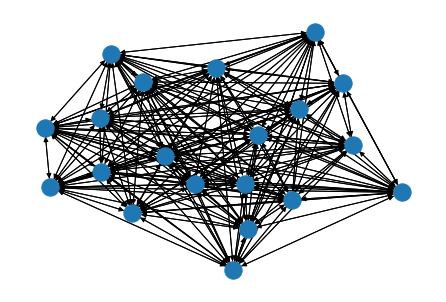

In [26]:
Gd= nx.DiGraph(L)
nx.draw(Gd)

In [28]:
PR=pageRank(L, 0.85) # dumping factor = 0.85 
print(PR)

54 iterations to convergence.
[0.11837805 0.02755329 0.01775741 0.05937604 0.07342496 0.05755738
 0.04896305 0.08820148 0.02477778 0.03457366 0.01775741 0.04290574
 0.06121102 0.05418507 0.05409661 0.03778514 0.04682346 0.03310986
 0.05881066 0.04275196]


Ci-dessous on visualise ce réseau en utilisant un code couleur (plus le noeud est rouge plus le PR est important) 

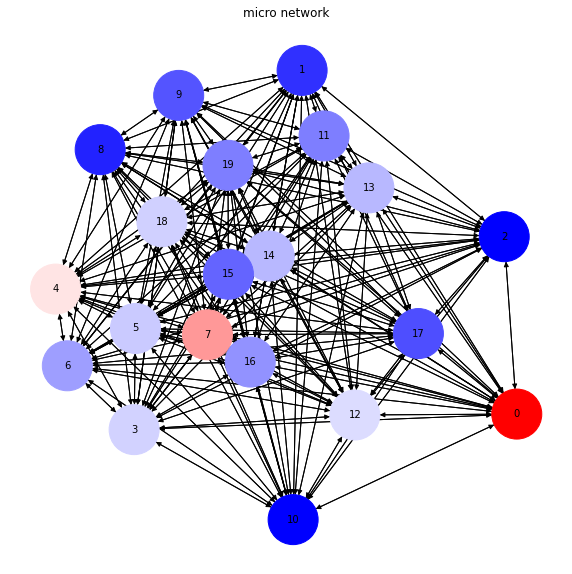

In [34]:
scores=PR
plt.figure(figsize=(10,10))
plt.title("Micro internet network ")
pos = nx.spring_layout(Gd)
nx.draw_networkx_labels(Gd, pos, font_size = 10, font_family = 'sans-serif')
nx.draw(Gd, pos, node_size=2500,node_color=scores, cmap='bwr')

### Bar plot

On présente ici , un diagramme à barres, pour chaque site web (numéroté) sur le réseau l'internet généré,

La hauteur de chaque barre sera le score du PageRank.


24 iterations to convergence.


Text(0, 0.5, 'PageRank score')

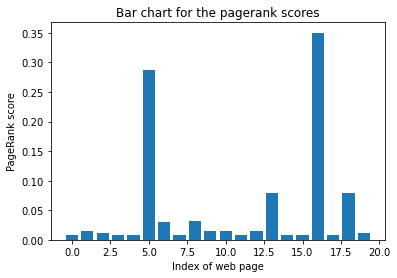

In [32]:
r = pageRank(generate_internet(20), 0.9)
plt.bar(np.arange(int(r.shape[0])), r)
plt.title("Bar chart for the pagerank scores")
plt.xlabel("Index of web page")
plt.ylabel("PageRank score")

$\pagebreak$

# PageRank sur des données réeles (un algorithme optimisée)

Implémentation de l'algorithme PageRank en utilisant les données de vols de http://www.openflights.org. L'algorithme calcule la valeur PageRank pour chaque aéroport dans les données d'entrée et renvoie le TOP-15 des aéroports les plus populaires.

***Le code source est diponible dans le scripte PageRank.py en pièce jointe*** 

In [54]:
sd.seedir('../', style='emoji',  exclude_folders=['.ipynb_checkpoints', '__pycache__', '.git', 'images'], exclude_files=['.gitignore'])

📁 ../
├─📁 data/
│ └─📄 routes.csv
└─📁 src/
  ├─📄 PageRank.py
  └─📄 Rendu du projet de l'UE Compléments de Mathèmatique pour la Bioinformatique.ipynb


In [9]:
from PageRank import *
G = edge_list_to_graph()
# we import here the PR optimized fucntion from file PageRank.py
scores=page_rank_optimized(0.85,100)
Top15 =scores[0][-15:]
Top15


[('JFK', 0.0030583394995878257),
 ('YYZ', 0.003112686718858364),
 ('LAX', 0.0033400603219505493),
 ('DXB', 0.003628873951936435),
 ('AMS', 0.003665074091796634),
 ('CDG', 0.0037133326331658697),
 ('IAH', 0.003760550443773899),
 ('PEK', 0.0037933602011664407),
 ('DME', 0.0039959793344200795),
 ('FRA', 0.004021179342826586),
 ('IST', 0.004027792880187284),
 ('DEN', 0.004075238619977567),
 ('ORD', 0.00438958590309358),
 ('DFW', 0.004472356149518679),
 ('ATL', 0.004782860407066599)]

***Finalement on représente ci-dessous la totalité du réseau aérien etudié en utilisant un code couleur***

On a essayé de normaliser les valeurs PR pour avoir une meilleure visualisation du code couleur 

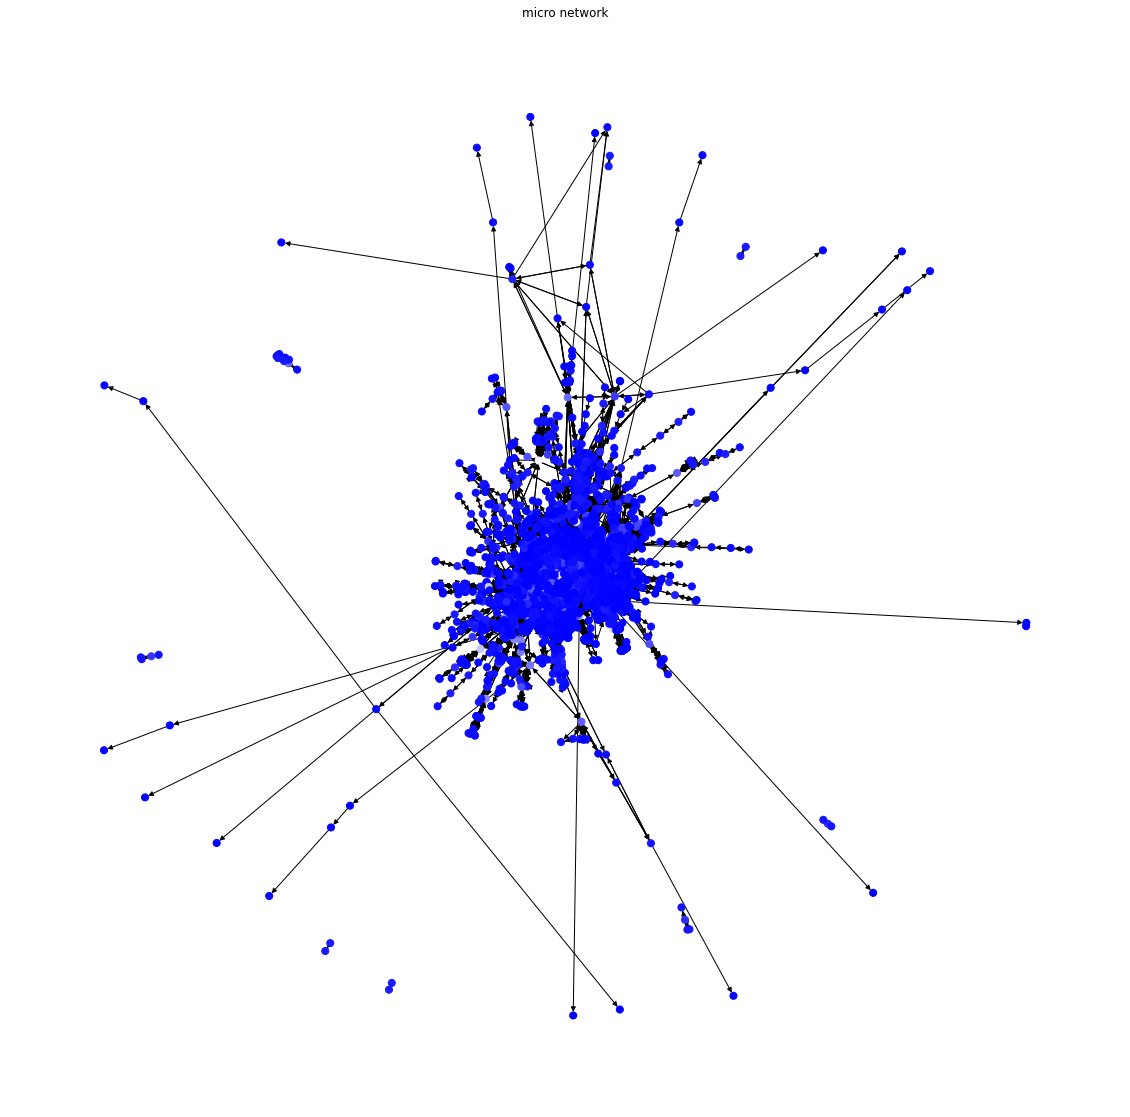

In [5]:
scores_=list(scores[1].values())
scores_=np.array(scores_)
norm=linalg.norm(scores_)
scores_=scores_/norm
scores_ =[  i*100 for i in scores_]

plt.figure(figsize=(20,20))
plt.title("micro network")
pos = nx.spring_layout(G)
nx.draw(G, pos,node_size=50, node_color=scores_, cmap='bwr')

$\pagebreak$

# Conclusion 
Finalement, On peut dire que PageRank est un algorithme qui permet de calculer l'importance d'un nœud dans un réseau, toutefois, il a été créé à la base pour trier des pages web selon leurs importances dans le réseau internet notamment avec le navigateur google, il peut être appliqué aussi dans le cadre d'autre réseaux (biologiques, sociaux, réseau aérien …). 

Mathématiquement parlant, le calcule de PageRank revient à calculer la centralité de chaque nœud en utilisant l'algèbre linéaire et le calcule matricielle. La centralité traduit l'importance d'un nœud du graph. 

D'une façon générale, Le PageRank d'un nœud est la somme de PageRank de tous les nœuds pondérés par la probabilité incidence  des  nœuds voisins.  $$x_i = κ^{-1} \sum_{j=1}^{N} A_{ij}x_j$$
                            